In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Random setup
rng = np.random.default_rng(7)

# random data
n = 200
x = np.linspace(0, 10, n)
y_true = np.sin(x) + 0.5*np.cos(2*x)
y = y_true + rng.normal(0, 0.25, size=n)

# inject normal noise in some
outlier_idx = rng.choice(n, size=6, replace=False)
y[outlier_idx] += rng.normal(3.0, 0.5, size=6)

In [4]:
order = np.argsort(x)
x = x[order]
y = y[order]
y_true = y_true[order]

In [5]:
i0 = n // 3
x0 = x[i0] # <- focal point

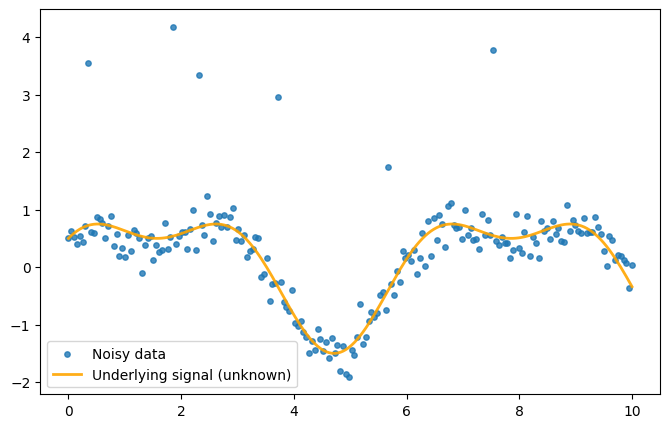

In [6]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=15, alpha=0.8, label="Noisy data")
plt.plot(x, y_true, linewidth=2, alpha=0.9, label="Underlying signal (unknown)", color="orange")
plt.legend()
plt.show()

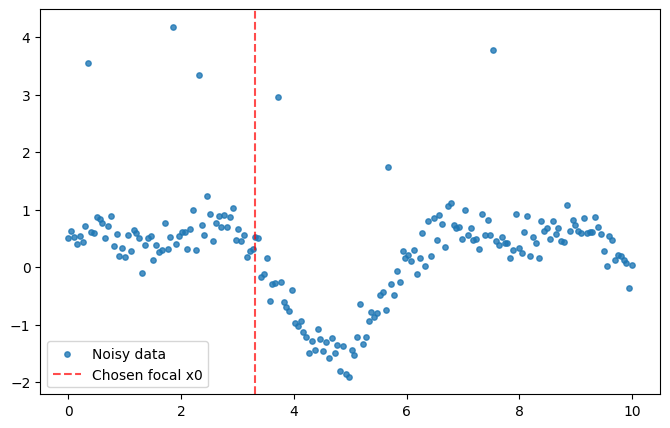

In [7]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=15, alpha=0.8, label="Noisy data")
plt.axvline(x0, linestyle="--", alpha=0.7, label="Chosen focal x0", color="red")
plt.legend()
plt.show()

In [8]:
# Select points with tricube distance from the focal point...
def tricube(u):
    u = np.clip(np.abs(u), 0, 1)
    return (1 - u**3)**3

r = int(np.ceil(0.25 * n))  # example bandwidth fraction f=0.25
dist = np.abs(x - x0)
idx_r = np.argpartition(dist, r-1)[:r]
d = dist[idx_r].max() if r > 0 else dist.max()
w_local = tricube(dist / (d if d > 0 else 1.0))

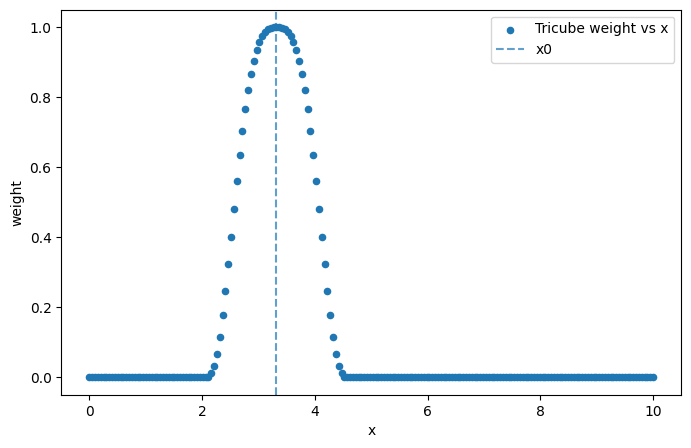

In [9]:
plt.figure(figsize=(8, 5))
plt.scatter(x, w_local, s=20, label="Tricube weight vs x")
plt.axvline(x0, linestyle="--", alpha=0.7, label="x0")
plt.xlabel("x")
plt.ylabel("weight")
plt.legend()
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x.reshape(-1,1), y.reshape(-1,1), sample_weight=w_local)
b0, a0 = model.coef_[0,0], model.intercept_[0]
y_line = a0 + b0 * x

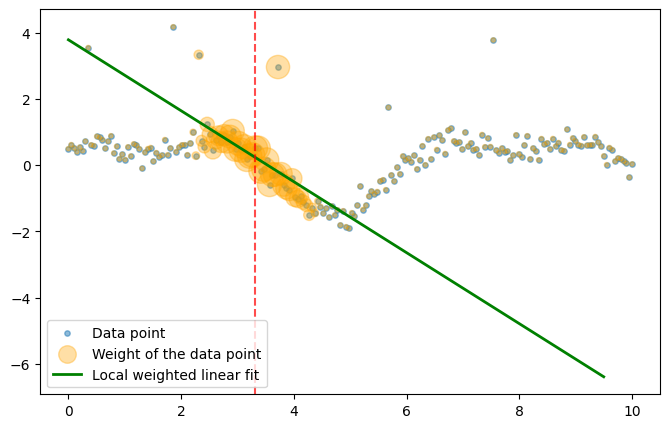

In [35]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=15, alpha=0.5, label="Data point",)
plt.scatter(x, y, s=10 + 300*w_local, alpha=0.35, label="Weight of the data point", color="orange")
plt.plot(x[:-10], y_line[:-10], linewidth=2, label="Local weighted linear fit", color="green")
plt.axvline(x0, linestyle="--", alpha=0.7, color="red")
plt.legend()
plt.show()

In [44]:
from statsmodels.nonparametric.smoothers_lowess import lowess
# Final lowess
y_hat_basic = lowess(y, x, frac=0.25, it=0, return_sorted=False, delta=0.0)

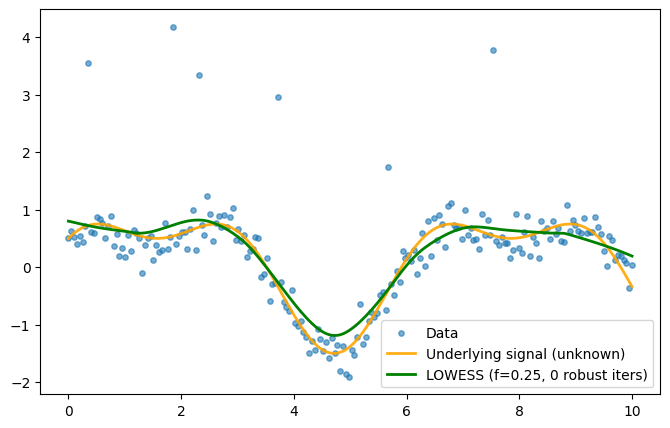

In [49]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=15, alpha=0.6, label="Data")
plt.plot(x, y_true, linewidth=2, alpha=0.9, label="Underlying signal (unknown)", color="orange")
plt.plot(x, y_hat_basic, linewidth=2, label="LOWESS (f=0.25, 0 robust iters)", color="green")
plt.legend()
plt.show()